## Conversion Rate

### Description

We have data about users who hit our site: whether they converted or not as well as some of their characteristics such as their country, the marketing channel, their age, whether they are repeat users and the number of pages visited during that session (as a proxy for site activity/time spent on site).

Your project is to:
* Predict conversion rate
* Come up with recommendations for the product team and the marketing team to improve conversion rate

### Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import h2o
import os
os.environ['JAVA_HOME'] = '/Library/Internet Plug-Ins/JavaAppletPlugin.plugin/Contents/Home'

In [2]:
df= pd.read_csv('/Users/YaoJunyan/Documents/A collection of Data Science take-home challenge/Conversion Rate/conversion_data.csv')

In [3]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [5]:
#check where are your users from

In [6]:
df['country'].value_counts()

US         178092
China       76602
UK          48450
Germany     13056
Name: country, dtype: int64

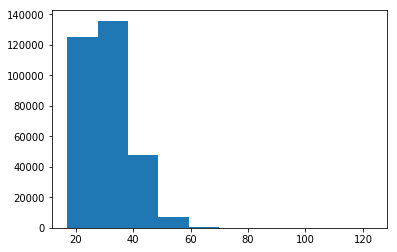

In [7]:
#check your users age distribution
plt.hist(df.age)
plt.show()

In [8]:
# where you get your user traffic

df['source'].value_counts()

Seo       155040
Ads        88740
Direct     72420
Name: source, dtype: int64

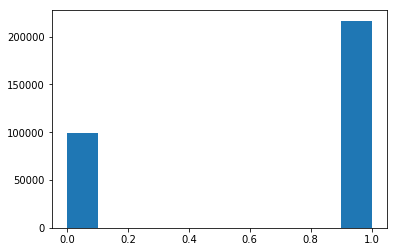

In [9]:
# check first user and return user distribution
fig, ax = plt.subplots()
labels = ['first user', 'return user']
plt.hist(df.new_user, label= labels)
plt.show()


In [10]:
df['converted'].value_counts()

0    306000
1     10200
Name: converted, dtype: int64

Text(0.5, 1.0, 'The number of converted/unconverted Users per Country')

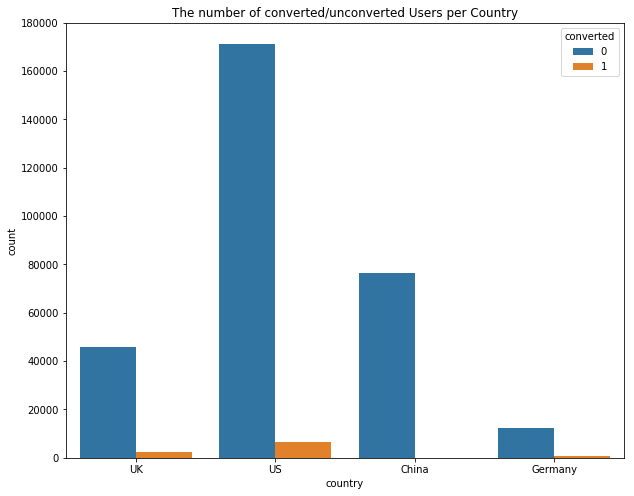

In [11]:
fig, ax= plt.subplots(figsize =(10,8))
sns.countplot(x= 'country', hue='converted', data= df)
ax.set_title('The number of converted/unconverted Users per Country')

In [12]:
## quick check: US has the most converted user

In [13]:
grouped = df.groupby('country')['converted'].mean().reset_index()

Text(0.5, 1.0, 'Mean Conversion Rate per Country')

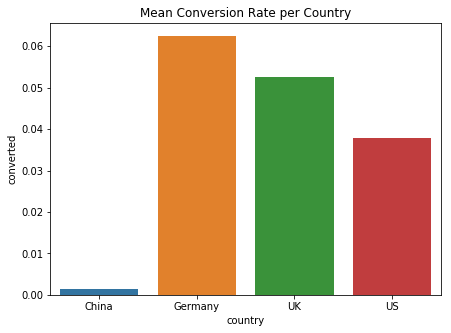

In [14]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x = 'country', y = 'converted', data= grouped)
ax.set_title('Mean Conversion Rate per Country')

In [15]:
## quick check: the highest conversion rate happens in Germany, then UK, then US. China has the lowest conversion rate

In [16]:
grouped_new_user = df.groupby('new_user')['converted'].mean().reset_index()
grouped_new_user

,new_user,converted
0,0,0.072002
1,1,0.014021


Text(0.5, 1.0, 'Average conversion rate by new_user/return user')

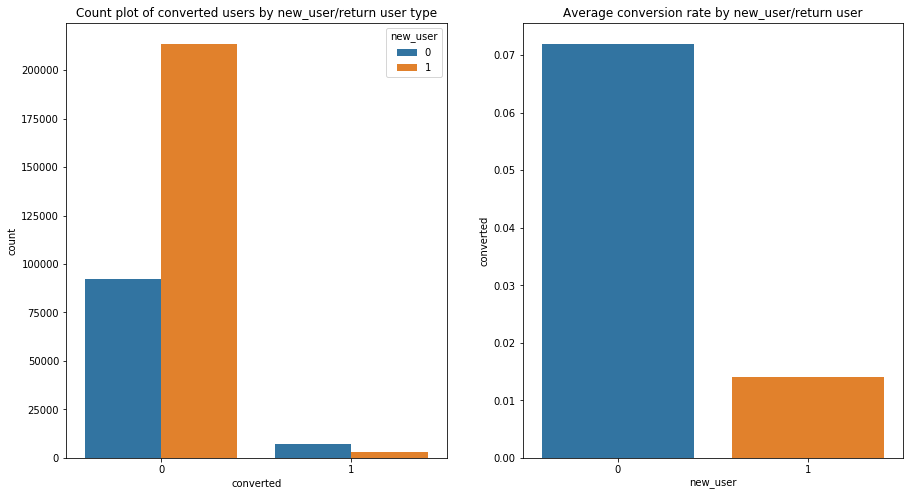

In [17]:
fig, (ax1, ax2)= plt.subplots(1,2,figsize=(15,8))
sns.countplot(x= 'converted', hue= 'new_user', data= df, ax =ax1)
ax1.set_title('Count plot of converted users by new_user/return user type')
sns.barplot(x = 'new_user', y = 'converted', data= grouped_new_user, ax= ax2)
ax2.set_title('Average conversion rate by new_user/return user')

In [18]:
# obvious observation: the number of new users visited more than return user. But the average return users' conversion rate is higher than new user

Text(0.5, 1.0, 'The average conversion rate per Source')

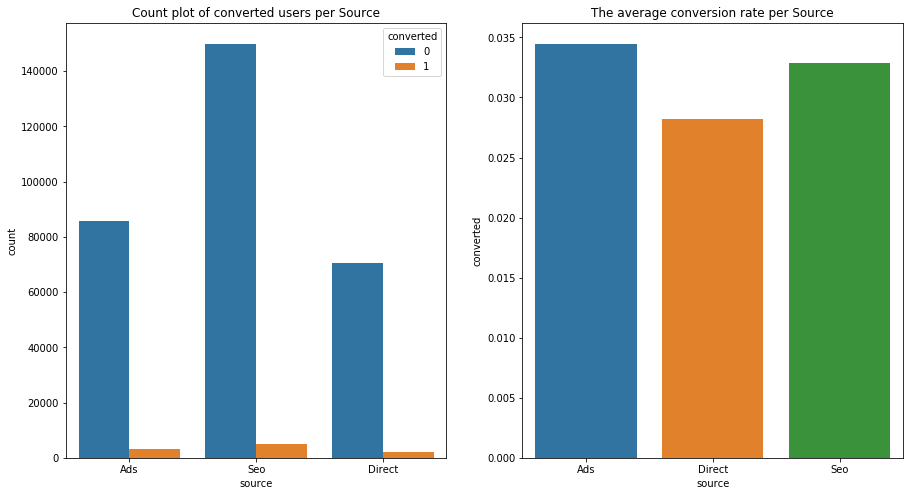

In [19]:
# do the same thing for source
grouped_source=  df.groupby('source')['converted'].mean().reset_index()
fig, (ax1, ax2) = plt.subplots(1,2, figsize= (15,8))
sns.countplot(x = 'source', hue= 'converted', data= df, ax= ax1)
ax1.set_title('Count plot of converted users per Source')
sns.barplot(x= 'source', y = 'converted', data= grouped_source, ax=ax2)
ax2.set_title('The average conversion rate per Source')

   converted  total_pages_visited
0          0             4.550281
1          1            14.553529


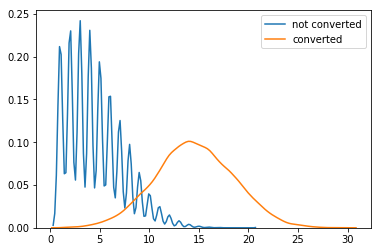

In [20]:
grouped_page_visits=  df.groupby('converted')['total_pages_visited'].mean().reset_index()
print(grouped_page_visits)
sns.kdeplot(df.total_pages_visited[df.converted == 0],label='not converted')
sns.kdeplot(df.total_pages_visited[df.converted == 1],label='converted')
plt.show()

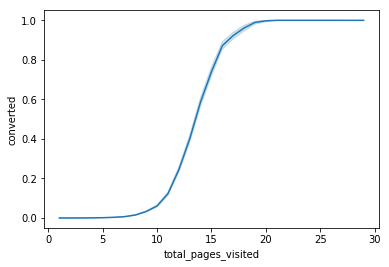

In [21]:
sns.lineplot(x= 'total_pages_visited', y= 'converted', data= df)

In [22]:
# SEO has the most number of visited and converted users. But Ads has the highest conversion rate

## Prediction- this is a classification problem

In [23]:
## encode age to groups
age_bins= [10, 20,30,40,50,60,80, 130]
df['AgeGroup'] = pd.cut(df['age'], bins=age_bins)


## evaluate the model

## make predictions
df.head()

,country,age,new_user,source,total_pages_visited,converted,AgeGroup
0,UK,25,1,Ads,1,0,"(20, 30]"
1,US,23,1,Seo,5,0,"(20, 30]"
2,US,28,1,Seo,4,0,"(20, 30]"
3,China,39,1,Seo,5,0,"(30, 40]"
4,US,30,1,Seo,6,0,"(20, 30]"


In [24]:
pd.Categorical(df.AgeGroup)

[(20, 30], (20, 30], (20, 30], (30, 40], (20, 30], ..., (20, 30], (20, 30], (20, 30], (20, 30], (20, 30]]
Length: 316200
Categories (7, interval[int64]): [(10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 80] < (80, 130]]

In [25]:
#df[['country', 'source']]= df[['country', 'source']].apply(lambda x: x.astype('category'))
#use one-hot encoding
encode_df =pd.get_dummies(df, columns=["country", "AgeGroup","source"])


In [26]:
## think about models that could fit
# try random forest first
from sklearn.model_selection import train_test_split
X_= encode_df[['country_China', 'country_Germany','country_UK','AgeGroup_(10, 20]','AgeGroup_(30, 40]','AgeGroup_(40, 50]', 'AgeGroup_(50, 60]',
       'AgeGroup_(60, 80]','AgeGroup_(80, 130]','new_user', 'source_Ads','source_Direct', 'total_pages_visited']]
y_= encode_df['converted']

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.3)
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9859687961205987


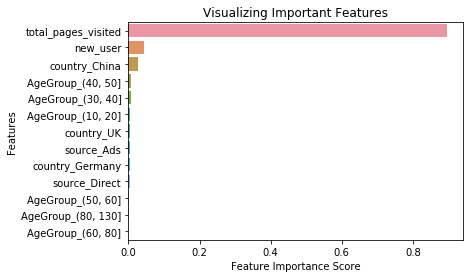

In [27]:
feature_name=['country_China', 'country_Germany','country_UK','AgeGroup_(10, 20]','AgeGroup_(30, 40]','AgeGroup_(40, 50]', 'AgeGroup_(50, 60]',
       'AgeGroup_(60, 80]','AgeGroup_(80, 130]','new_user', 'source_Ads','source_Direct', 'total_pages_visited']
feature_imp = pd.Series(clf.feature_importances_, index=feature_name).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [28]:
X_2= encode_df[['country_China', 'country_Germany','country_UK','AgeGroup_(10, 20]','AgeGroup_(30, 40]','AgeGroup_(40, 50]', 'AgeGroup_(50, 60]',
       'AgeGroup_(60, 80]','AgeGroup_(80, 130]','new_user', 'source_Ads','source_Direct']]
y_2= encode_df['converted']
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.3)



#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9672991777356104


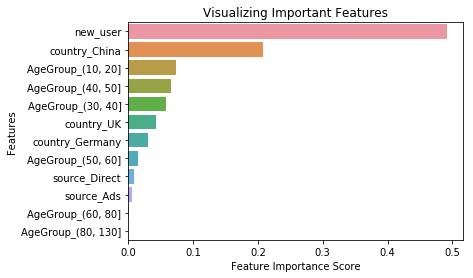

In [29]:
# accuracy went down a little; let's check the feature importance 
feature_name=['country_China', 'country_Germany','country_UK','AgeGroup_(10, 20]','AgeGroup_(30, 40]','AgeGroup_(40, 50]', 'AgeGroup_(50, 60]',
       'AgeGroup_(60, 80]','AgeGroup_(80, 130]','new_user', 'source_Ads','source_Direct']
feature_imp = pd.Series(clf.feature_importances_, index=feature_name).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

#### Some insights so far:

* New user feature is very important in conversion. Old accounts are doing very well. So we might want to use sources to target more returned users.
* Ads conversion rate is the highest among other sources. So we might want to choose Ads as main marketing method.
* Germany users are doing a lot better than other country users. We can work to get more Germany.
* Most of users are young users. we can use the marketing channel that targets on young users




#### Some conclusions and suggestions from the book:
1. The site is working very well for young users. Definitely let’s tell marketing to advertise and use marketing channel which are more likely to reach young people.
2. The site is working very well for Germany in terms of conversion. But the summary showed that there are few Germans coming to the site: way less than UK, despite a larger population. Again, marketing should get more Germans. Big opportunity.
3. Users with old accounts do much better. Targeted emails with offers to bring them back to the site could be a good idea to try.
4. Something is wrong with the Chinese version of the site. It is either poorly translated, doesn’t fit the local culture, some payment issue or maybe it is just in English! Given how many users are based in China, fixing this should be a top priority. Huge opportunity.
5. Maybe go through the UI and figure out why older users perform so poorly? From 30 y/o conversion clearly starts dropping.
6. If I know someone has visited many pages, but hasn’t converted, she almost surely has high purchase intent. I could email her targeted offers or sending her reminders. Overall, these are probably the easiest users to make convert.